# Part 7 - Machine Learning - DNN
This example will show how to prepare Machine Learning process
- set up environment including importing machine learning package and setting up parameter
- Prepare placeholder
- Build DNN architecture
- Set up loss function
- Set up gradient descent and learning rate
- Set up evaluation 
- Initialize placeholder
- Import data
- Expore data such as data visualization
- Prepare train and validation data
- Train the model with train data 
- Validate the trained model with validation data

In [1]:
### Import TensorFlow
import tensorflow as tf
import numpy as np

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [2]:
### Prepare Tensorflow placeholder
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [3]:
### Build DLL architectture - hidden & output layers
hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [4]:
### Set up loss function
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
loss_summary = tf.summary.scalar('log_loss', loss)

In [5]:
### Set up gradient descent and learning rate

learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

In [6]:
### Set up Evaludation function
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [7]:
### Initialize all the variables
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [8]:
### Import data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

C:\Users\kevinlee\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [9]:
### Data Exporation
print("Shape of input Train data : ", mnist.train.images.shape)
print("Shape of input Test data : ", mnist.test.images.shape)
print("Sample Label data : ", mnist.train.labels[1])
print("Sample Image data : ", mnist.train.images[1])

Shape of input Train data :  (55000, 784)
Shape of input Test data :  (10000, 784)
Sample Label data :  3
Sample Image data :  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.

Y value is : [6]


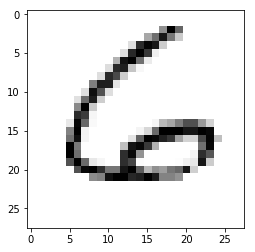

In [13]:
## import matplotlib packages
import matplotlib
import matplotlib.pyplot as plt
## Jupyter notebook display 
%matplotlib inline

### Data Visualzation
X_1=mnist.train.next_batch(1)
digit_image2 = X_1[0].reshape(28, 28)

### Show that image
print("Y value is :", X_1[1])
plt.imshow(digit_image2, cmap = matplotlib.cm.binary,
           interpolation="nearest")

Y value is : [8]


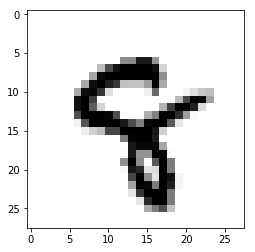

In [14]:
### Data Visualization
X_1=mnist.train.next_batch(1)
digit_image2 = X_1[0].reshape(28, 28)

### Show that image
print("Y value is :", X_1[1])
plt.imshow(digit_image2, cmap = matplotlib.cm.binary,
           interpolation="nearest")

In [15]:
n_epochs = 40
batch_size = 50

### Train your model
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                            y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)


0 Train accuracy: 0.88 Test accuracy: 0.9079
1 Train accuracy: 0.9 Test accuracy: 0.9206
2 Train accuracy: 0.9 Test accuracy: 0.9329
3 Train accuracy: 0.98 Test accuracy: 0.9361
4 Train accuracy: 0.9 Test accuracy: 0.9417
5 Train accuracy: 0.94 Test accuracy: 0.9477
6 Train accuracy: 1.0 Test accuracy: 0.9509
7 Train accuracy: 0.98 Test accuracy: 0.9547
8 Train accuracy: 0.98 Test accuracy: 0.9571
9 Train accuracy: 0.98 Test accuracy: 0.9602
10 Train accuracy: 0.98 Test accuracy: 0.9598
11 Train accuracy: 0.98 Test accuracy: 0.9638
12 Train accuracy: 0.96 Test accuracy: 0.9629
13 Train accuracy: 0.96 Test accuracy: 0.9658
14 Train accuracy: 0.98 Test accuracy: 0.9679
15 Train accuracy: 0.96 Test accuracy: 0.9681
16 Train accuracy: 1.0 Test accuracy: 0.9696
17 Train accuracy: 0.94 Test accuracy: 0.9703
18 Train accuracy: 0.98 Test accuracy: 0.9706
19 Train accuracy: 1.0 Test accuracy: 0.9712
20 Train accuracy: 0.96 Test accuracy: 0.9721
21 Train accuracy: 1.0 Test accuracy: 0.9732
22 Tr